In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 181 runs
Auto parsing failed with: test-cmd_200129-123106
Auto parsing failed with: test-cmd_200129-181621
Auto parsing failed with: test-cmd_200129-184754
Auto parsing failed with: test-cmd_200129-220436
Auto parsing failed with: test-cmd_200129-220823
Auto parsing failed with: test-cmd_200129-220851
Auto parsing failed with: test-cmd_200129-221006
Auto parsing failed with: test-cmd_200129-223408
Auto parsing failed with: test-cmd_200129-223445
Auto parsing failed with: test-cmd_200129-230209
Auto parsing failed with: test-cmd_200129-230317
Auto parsing failed with: test-cmd_200129-230424
Auto parsing failed with: test-cmd_200129-230534
Auto parsing failed with: test-cmd_200129-230658
Auto parsing failed with: test-cmd_200131-125233
Auto parsing failed with: test-cmd_200131-125639
Auto parsing failed with: test-cmd_200131-131602
Auto parsing failed with: test-cmd_200131-131825
Auto parsing failed with: test-pycharm_200129-191211
Auto parsing failed with: test-pycharm_200129-1912

In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [25]:
M.clear_filters().filter_strs('!test')


# M.filter_jobs(7)
# M.filter_models('ae')
# M.filter_datasets('3dSshape1')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history)
M.filter_models('wgan')

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


  0) 3dshapes-wgan_0032-6046960-00_200131-135744
  1) 3dshapes-wgan_0032-6046960-01_200131-140048
  2) 3dshapes-wgan_0032-6046960-02_200131-135744
  3) 3dshapes-wgan_0001-6026517-02_200129-000957
  4) celeba-wgan_0019-6035187-00_200129-232452
  5) celeba-wgan_0019-6035187-01_200129-232829
  6) celeba-wgan_0019-6035187-02_200129-232838
  7) 3dshapes-wgan_0003-6026539-00_200129-002531
  8) 3dshapes-wgan_0008-6027504-00_200129-124446
  9) 3dshapes-wgan_0008-6027504-01_200129-124512


In [28]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last
3dshapes-wgan_0032-6046960-00_200131-135744 has no checkpoint
3dshapes-wgan_0032-6046960-01_200131-140048 has no checkpoint
3dshapes-wgan_0032-6046960-02_200131-135744 has no checkpoint
Loaded configs


In [24]:
M.show('all')

  0) 3dSshape1-dvae_0010-6027546-00_200129-125909


KeyError: 'ckpt'

> /is/ei/fleeb/workspace/humpack/humpack/basic_containers.py(179)__getitem__()
    177 
    178         def __getitem__(self, item):
--> 179                 return self._data[item]
    180 
    181 	def __setitem__(self, key,

ipdb> q


In [19]:
M.clear_run_cache()

In [20]:
# M.sort_by('job')
# print('\n'.join('unbuffer python hybrid.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print()


# print('\n'.join('unbuffer python hybrid.py n/t/box-s1-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

# print('\n'.join('unbuffer python hybrid.py n/t/box-s2-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

# print('\n'.join('unbuffer python hybrid.py n/t/box-s3-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

In [30]:
run = M[1]
run.name

'celeba-wgan_0019-6035187-00_200129-232452'

In [31]:
run.config

{{'auto_name':True, 'dataroot':'/home/fleeb/local_data/', 'dataset':{{'batch_size':32, 'drop_last':False, 'name':'celeba', 'shuffle':True}}, 'device':'cuda', 'info':{{'dataset_type':'celeba', 'date':'200129-232452', 'history':['n/gan', 'n/large-double', 'n/celeba', 'n/basics', 'base'], 'model_type':'wgan'}}, 'job':{{'ID':'6035187', 'num':'19', 'ps':'0'}}, 'legacy':False, 'model':{{'_type':'wgan', 'beta1':0.9, 'beta2':0.999, 'channels':[64, 64, 128, 128, 128, 256], 'criterion':{{'name':'bce', 'reduction':'sum'}}, 'disc_steps':5, 'discriminator':{{'_type':'double-enc', 'beta1':0.5, 'beta2':0.9, 'dout':1, 'fc':[256, 128, 64], 'latent_dim':1, 'tail':{{'_type':'mlp', 'hidden_dims':[256, 128, 64]}}}}, 'downsampling':'max', 'encoder':{{'_type':'double-enc', 'tail':{{'_type':'mlp', 'hidden_dims':[256, 128]}}}}, 'factors':2, 'fc':[256, 128], 'gan_reg_wt':10, 'gan_wt':1, 'generator':{{'_type':'double-dec', 'channels':[256, 128, 128, 128, 64, 64], 'factors':2, 'fc':[128, 128, 128, 256], 'head':{{

In [32]:
M.clear_run_cache()

In [33]:
S = run.reset()

In [34]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [35]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/celeba-wgan_0019-6035187-00_200129-232452/checkpoint_18.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/celeba-wgan_0019-6035187-00_200129-232452/checkpoint_18.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
crop_size: 128 (by default)
crop_loc: center (by default)
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
label_type: None (by default)
train: True
resize: None
din: (3, 128, 128)
dout: (3, 128, 128) (by default)
Model-type: wgan
Creating encoder (type=double-enc)
  in_shape --> din: (3, 128, 128) (in parent)
  channels: [64, 64, 128, 128, 128, 256] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 32 (in parent)
  Creating tail (type=mlp)
    input_dim --> din: (256, 2, 2)
    output_dim --> dout: 32
    hidden_dims: [25

In [36]:

run.run(pbar=tqdm)

/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [37]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/celeba-wgan_0019-6035187-00_200129-232452/checkpoint_18.pth.tar'

In [38]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


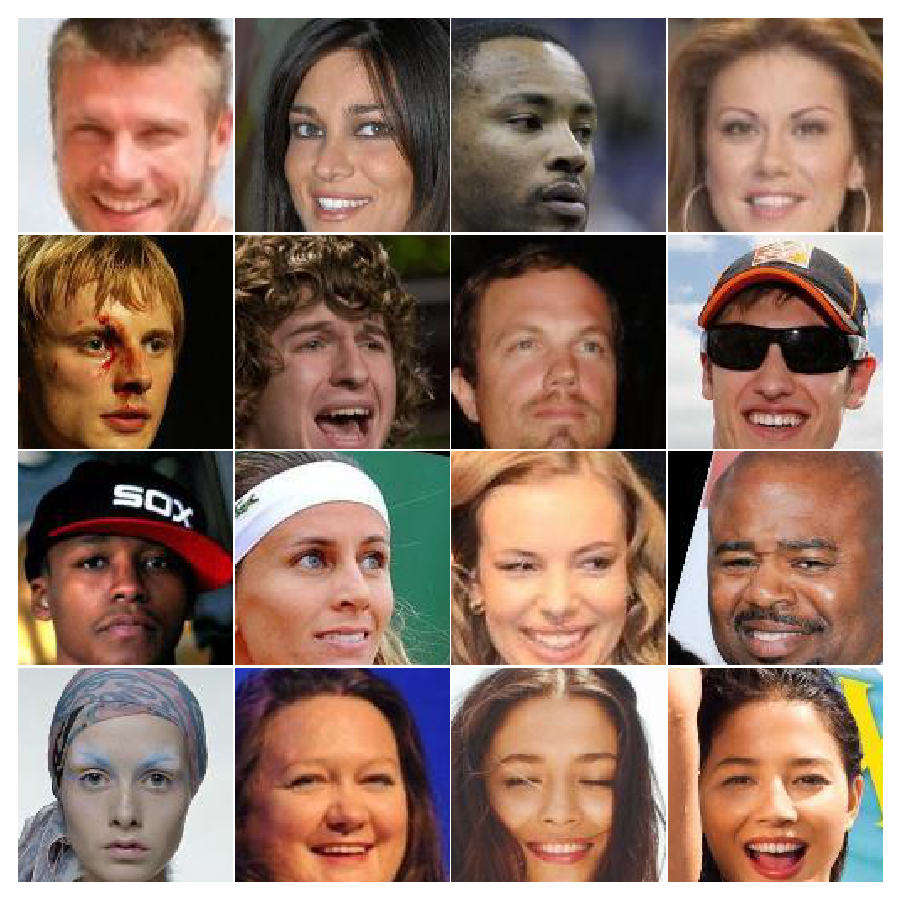

In [39]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


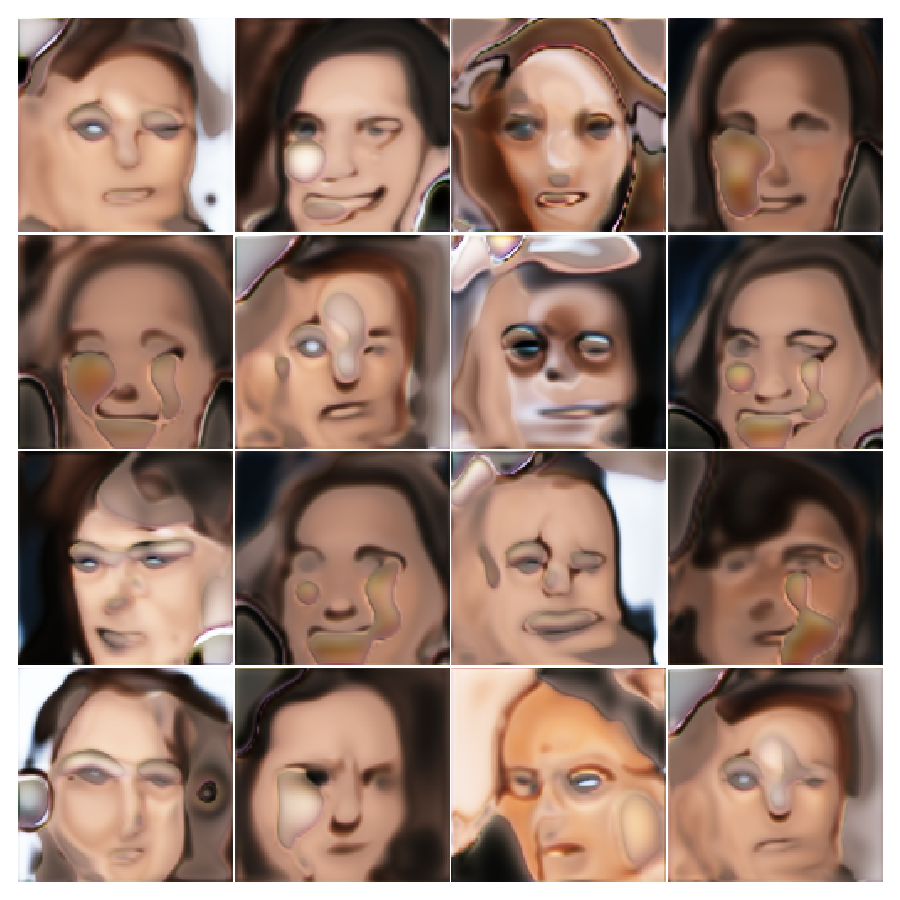

In [40]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


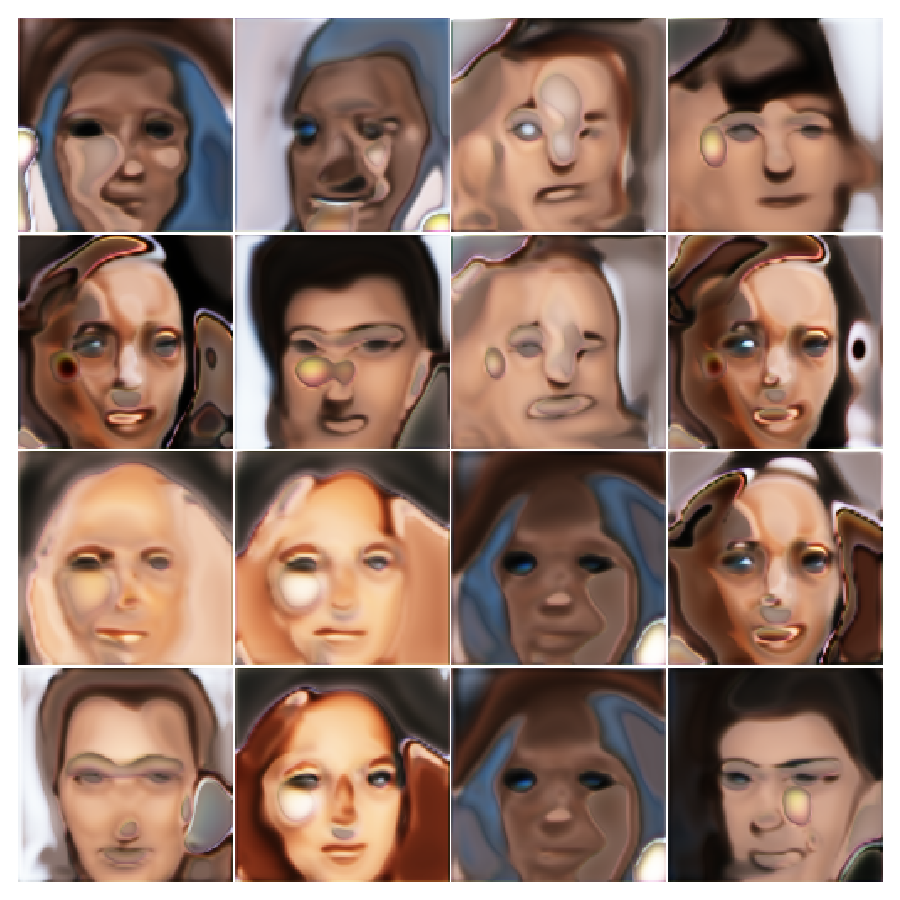

In [41]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


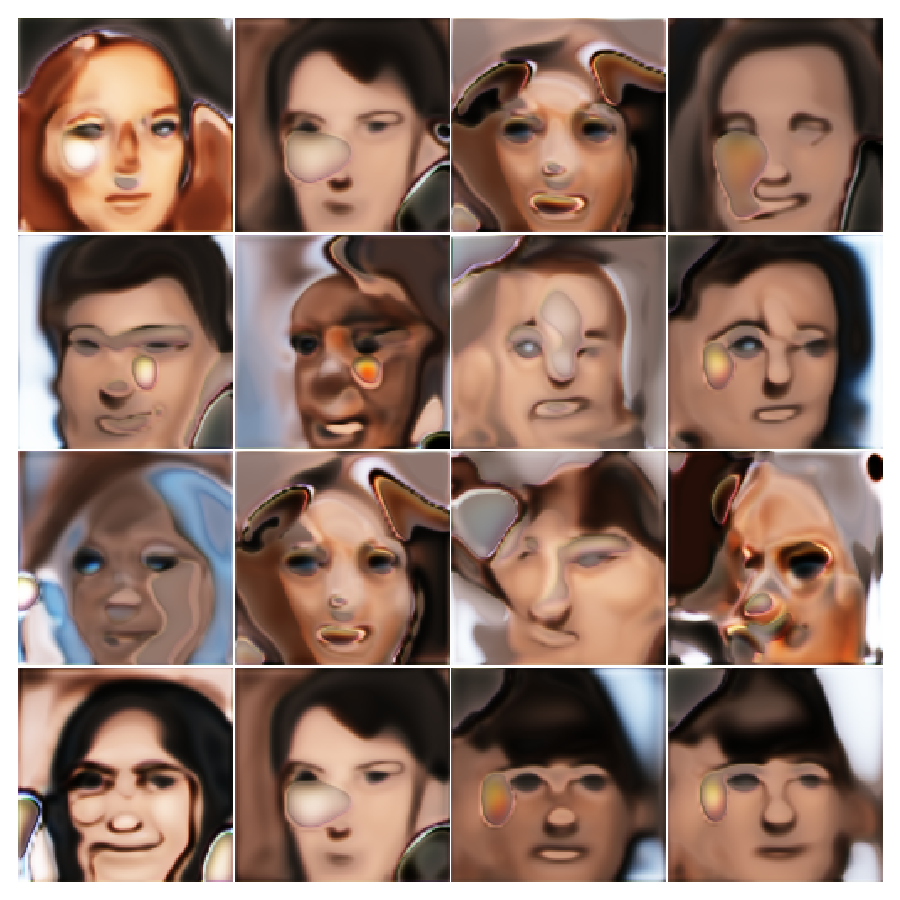

In [42]:
viz['gens'][0].view(scale=2)

In [43]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


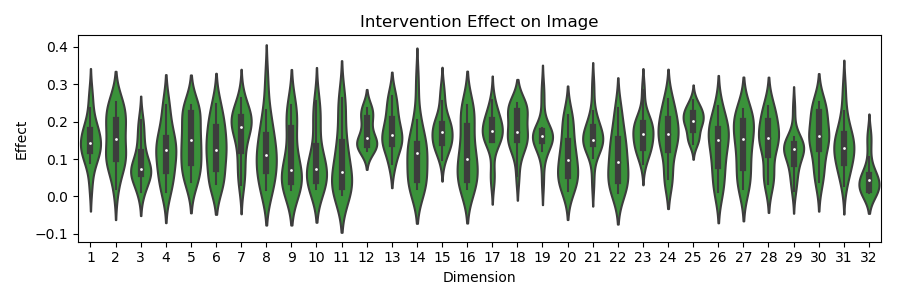

In [44]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


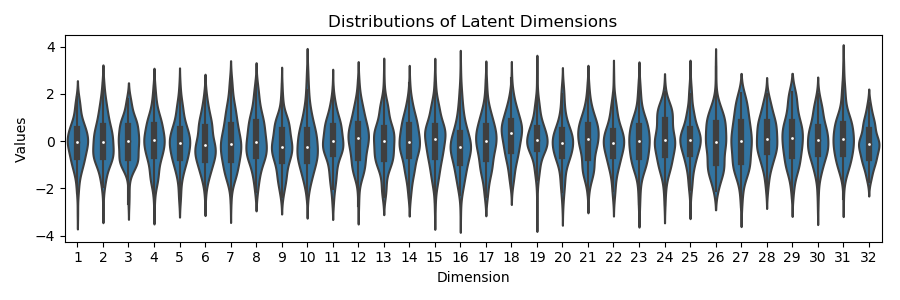

In [45]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [88]:
# evals = run.evaluate(pbar=tqdm)

In [89]:
# update_checkpoint(S, 'evals', overwrite=True)

In [90]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [48]:
# S.keys()

In [49]:
# S.hello = 'world'

In [30]:
# update_checkpoint(S, 'hello')

In [31]:
# viz_

In [32]:
# S.fid_gen_stats.keys()

In [33]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [34]:
# import pickle

In [35]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [36]:
# f

In [37]:
# run.state.keys()

In [38]:
# model = run.state.model

In [39]:
# q = run.state.q
# q.shape

In [40]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [41]:
# show_nums(imgs)

In [91]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/viewing/'
run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-dwae_0004-6026551-03_200129-003324_ckpt39
	Model saved
	Config saved
	Visualization saved
	Results saved: val_Q


'/is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-dwae_0004-6026551-03_200129-003324_ckpt39'